# 4

## a. First, calculate each of your 10 selected bonds’ yield

In [9]:
import pandas as pd
from bond_pricing.simple_bonds import bond_yield
df = pd.read_csv('A1d.csv')
df

,Name,ISIN,issue date,maturity date,coupon,10,11,12,13,14,17,18,19,20,21
0,CAN 0.25 Mar1,CA135087G328,10/11/2016,3/1/2022,0.50%,100.04,100.04,100.03,100.03,100.03,100.02,100.01,100.01,100.01,100.01
1,CAN 1.75 Mar1,CA135087H490,10/6/2017,3/1/2023,1.75%,100.93,100.92,100.90,100.87,100.85,100.76,100.71,100.71,100.71,100.75
2,CAN 2.25 Mar1,CA135087J546,10/5/2018,3/1/2024,2.25%,102.32,102.29,102.28,102.23,102.18,102.00,101.91,101.89,101.89,101.99
3,CAN 1.50 SEP1,CA135087J967,4/5/2019,9/1/2024,1.50%,100.55,100.52,100.56,100.45,100.44,100.32,100.14,100.02,100.04,100.11
4,CAN 1.25 Mar1,CA135087K528,10/11/2019,3/1/2025,1.25%,99.65,99.66,99.62,99.59,99.50,99.26,99.13,99.11,99.12,99.29
5,CAN 0.50 SEP1,CA135087K940,4/3/2020,9/1/2025,0.50%,96.71,96.74,96.72,96.74,96.68,96.41,96.25,96.15,96.18,96.34
6,CAN 0.25 Mar1,CA135087L518,10/9/2020,3/1/2026,0.25%,95.12,95.16,95.13,95.16,95.06,94.76,94.56,94.51,94.55,94.73
7,CAN 1.00 SEP1,CA135087L930,4/16/2021,9/1/2026,1.00%,97.66,97.70,97.67,97.70,97.59,97.24,97.02,96.96,97.00,97.23
8,CAN 1.50 Jun 1,CA135087M276,4/26/2021,6/1/2031,1.50%,98.02,98.13,98.03,98.14,97.87,97.33,96.99,96.88,96.99,97.51
9,CAN 1.25 Mar1,CA135087M847,10/15/2021,3/1/2027,1.25%,98.41,98.45,98.41,98.46,98.33,97.96,97.72,97.67,97.71,97.98


In [10]:
for col in range(10, 22):
    if str(col) not in df.columns:
        continue
    # df[f'{col}_ytm'] = df[str(col)]
    for idx in df.index:
        df.loc[idx, f'{col}_ytm'] = bond_yield(
            settle=f'2022-01-{col}',
            mat=df.loc[idx, 'maturity date'],
            cpn=float(df.loc[idx, 'coupon'][:-1]) / 100,
            price=df.loc[idx, str(col)]
        )

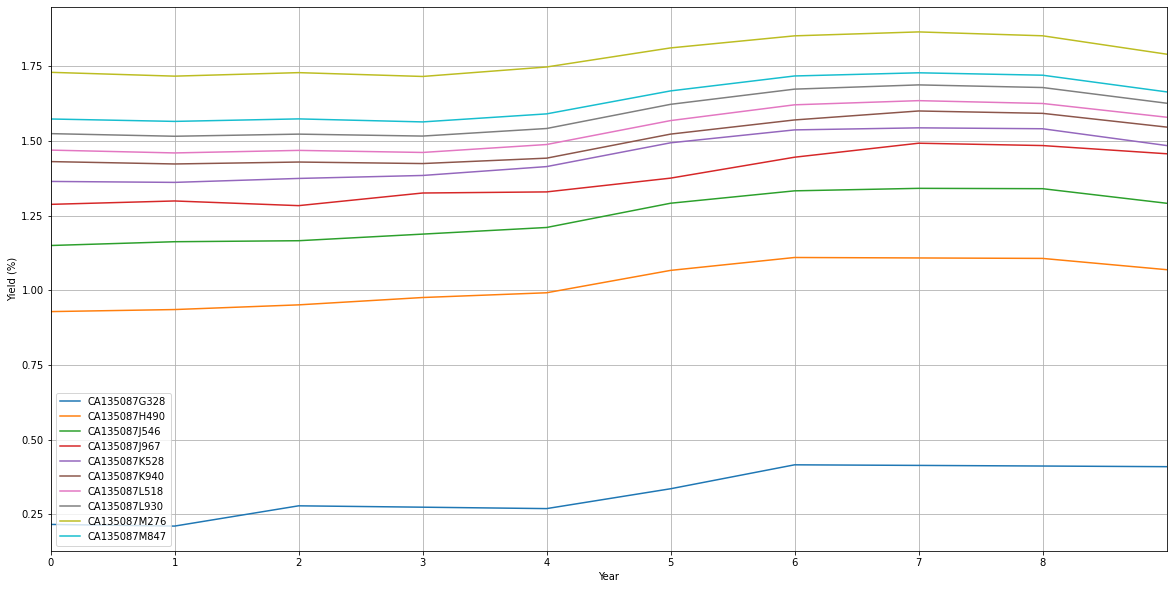

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 10))
for name in df['ISIN ']:
    arr = df.set_index('ISIN ').loc[
        name, 
        [f'{col}_ytm' for col in range(10, 22) if str(col) in df.columns] 
    ].T.reset_index()
    plt.plot(arr.drop('index', axis=1) * 100, label=name)
plt.xticks(range(9))
plt.xlim(0, 9)
plt.xlabel('Year')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid()

## b. Write a pseudo-code (explanation of an algorithm) for how you would derive the spot curve with terms ranging from 1-5 years from your chosen bonds in part 2 

Step 1: Choose the data for the spot rate, i.e. 10 in the case

Step 2: Enumerate all ytm from n_ytm for n=11, 11, ...21

apply the following formula
    
spot_rate_n = power((1 + n_ytm) ** n / (1 + 10_ytm), 1 / (n - 1)) - 1

Step 3: Repeat step 2 for all bonds and get the final spot rates

## c. Write a pseudo-code for how you would derive the 1-year forward curve with terms ranging from 2-5 years from your chosen bonds in part 

This just needs to work in the opposite direction of the steps in part b

Step 1: Choose the spot date, in the case, to be 10

Step 2: For rate_n, n=2, 3, 4, 5

apply the following formula

forward_rate_n = power((1 + rate_n) ** (n - 1) * (1 + rate_n), 1 / n) - 1

Step 3: Repeat step 2 for all bonds and get the final results
    

# 5

In [12]:
# log-returns of yield
import numpy as np
cov_yield = (df[[col for col in df.columns if 'ytm' in col]].T.pct_change() + 1).apply(np.log).cov()
cov_yield

,0,1,2,3,4,5,6,7,8,9
0,0.016076,0.002317,0.001615,0.000645,0.001833,0.001798,0.001905,0.001839,0.001535,0.001796
1,0.002317,0.000891,0.000794,0.000483,0.000720,0.000638,0.000652,0.000654,0.000536,0.000630
2,0.001615,0.000794,0.000745,0.000476,0.000664,0.000603,0.000604,0.000610,0.000503,0.000587
3,0.000645,0.000483,0.000476,0.000576,0.000391,0.000413,0.000381,0.000385,0.000300,0.000359
4,0.001833,0.000720,0.000664,0.000391,0.000629,0.000575,0.000584,0.000586,0.000499,0.000568
5,0.001798,0.000638,0.000603,0.000413,0.000575,0.000586,0.000572,0.000570,0.000477,0.000548
6,0.001905,0.000652,0.000604,0.000381,0.000584,0.000572,0.000578,0.000573,0.000482,0.000554
7,0.001839,0.000654,0.000610,0.000385,0.000586,0.000570,0.000573,0.000570,0.000481,0.000552
8,0.001535,0.000536,0.000503,0.000300,0.000499,0.000477,0.000482,0.000481,0.000422,0.000470
9,0.001796,0.000630,0.000587,0.000359,0.000568,0.000548,0.000554,0.000552,0.000470,0.000536


In [13]:
# forward rate
forward_rate_cov = (df[[col for col in df.columns if 'ytm' in col]].T / df[[col for col in df.columns if 'ytm' in col]].T.shift(2)).apply(np.log).cov()
forward_rate_cov

,0,1,2,3,4,5,6,7,8,9
0,0.027780,0.005805,0.004699,0.003172,0.004315,0.004246,0.004408,0.004303,0.003429,0.004157
1,0.005805,0.002218,0.001990,0.001277,0.001834,0.001667,0.001769,0.001736,0.001441,0.001668
2,0.004699,0.001990,0.001844,0.001245,0.001706,0.001607,0.001680,0.001650,0.001371,0.001584
3,0.003172,0.001277,0.001245,0.001387,0.001157,0.001293,0.001255,0.001233,0.001005,0.001168
4,0.004315,0.001834,0.001706,0.001157,0.001581,0.001499,0.001562,0.001534,0.001276,0.001473
5,0.004246,0.001667,0.001607,0.001293,0.001499,0.001585,0.001590,0.001559,0.001268,0.001490
6,0.004408,0.001769,0.001680,0.001255,0.001562,0.001590,0.001624,0.001591,0.001296,0.001522
7,0.004303,0.001736,0.001650,0.001233,0.001534,0.001559,0.001591,0.001559,0.001274,0.001493
8,0.003429,0.001441,0.001371,0.001005,0.001276,0.001268,0.001296,0.001274,0.001058,0.001222
9,0.004157,0.001668,0.001584,0.001168,0.001473,0.001490,0.001522,0.001493,0.001222,0.001430


#  6. Calculate the eigenvalues and eigenvectors of both covariance matrice

In [14]:
# log-returns of yield
cov_yield_eig, cov_yield_eig_vec = np.linalg.eig(cov_yield)
cov_yield_eig

array([ 1.81620311e-02,  3.00171848e-03,  2.56528342e-04,  1.57799093e-04,
        1.84229308e-05,  7.29908856e-06,  3.32488677e-06,  6.30854973e-07,
       -6.61594732e-20,  5.42697864e-21])

It means the covariance matrix cov_yield_eighas the max variance projection to be the eigen value to be 1.81620311e-02 in the direction of that eigen vector 

In [15]:
# forward rate
forward_rate_eig, forward_rate_eig_vec = np.linalg.eig(forward_rate_cov)
forward_rate_eig

array([ 3.54808007e-02,  5.86038085e-03,  5.24820469e-04,  1.81786082e-04,
        1.49629087e-05,  3.01844845e-06,  1.48522949e-06, -6.84005346e-20,
        3.93847323e-19,  2.15662965e-19])

It means the covariance matrix forward_rate_eig the max variance projection to be the eigen value to be 3.54808007e-02 in the direction of that eigen vector 